Pair programming Nulos
Ejercicios gestión de nulos

En este pair programming usaremos el csv que generamos en el pair programming de ayer. El objetivo del ejercicio es identificar las columnas que contienen valores nulos y aplicar un proceso de imputación para manejarlos de manera adecuada.

Instrucciones:

Identificación de Valores Nulos: Identifica todas las columnas que contengan valores nulos en el DataFrame.

Selección de Método de Imputación: Discute en tu compañera cuál sería la mejor estrategia para manejar los valores nulos en cada una de las columnas identificadas en el paso anterior.

Imputación de Valores Nulos: Implementa el método de imputación seleccionado en el paso 2 para llenar los valores nulos en las columnas.

Informe: Añade al final de un jupyter una explicación breve que describa las columnas que tenían valores nulos, cómo decidiste imputarlos y cualquier observación adicional que consideres importante sobre el proceso de limpieza de datos.

Nota: Puedes utilizar cualquier método o estrategia de imputación que consideres adecuado para los datos y discutir las ventajas y desventajas de tu elección en el informe.

Previous


In [1]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Imputación de nulos usando métodos avanzados estadísticos
# -----------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer

# Librerías de visualización
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

In [2]:
# cargamos el dataframe creado en la lección anterior
df = pd.read_csv("world_data_total_2.csv", index_col = 0)
df.head(6)

,density(p/km2),abbreviation,agricultural_land,land_area,armed_forces_size,birth_rate,calling_code,capital/major_city,co2-emissions,cpi,cpi_change,currency-code,fertility_rate,forested_area,gasoline_price,unnamed_0_y,gdp,gross_primary_education_enrollment,gross_tertiary_education_enrollment,infant_mortality,largest_city,life_expectancy,maternal_mortality_ratio,minimum_wage,official_language,out_of_pocket_health_expenditure,physicians_per_thousand,population,population_labor_force_participation,tax_revenue,total_tax_rate,unemployment_rate,urban_population,country,latitud,longitud,continent
unnamed_0_x,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,60.0,AF,58.1,652230.0,323000.0,32.49,93.0,Kabul,8672.0,149.90,2.3,AFN,4.47,2.1,0.70,0,1.910135e+10,104.0,9.7,47.9,Kabul,64.5,638.0,0.43,Pashto,78.4,0.28,38041754.0,48.9,9.3,71.4,11.12,9797273.0,Afghanistan,NaN,NaN,Asia
1,105.0,AL,43.1,28748.0,9000.0,11.78,355.0,Tirana,4536.0,119.05,1.4,ALL,1.62,28.1,1.36,1,1.527808e+10,107.0,55.0,7.8,Tirana,78.5,15.0,1.12,Albanian,56.9,1.20,2854191.0,55.7,18.6,36.6,12.33,1747593.0,Albania,NaN,NaN,Europe
2,18.0,DZ,17.4,2381741.0,317000.0,24.28,213.0,Algiers,150006.0,151.36,2.0,DZD,3.02,0.8,0.28,2,1.699882e+11,109.9,51.4,20.1,Algiers,76.7,112.0,0.95,Arabic,28.1,1.72,43053054.0,41.2,37.2,66.1,11.70,31510100.0,Algeria,NaN,NaN,Africa
3,164.0,AD,40.0,468.0,NaN,7.20,376.0,Andorra la Vella,469.0,NaN,NaN,EUR,1.27,34.0,1.51,3,3.154058e+09,106.4,NaN,2.7,Andorra la Vella,NaN,NaN,6.63,Catalan,36.4,3.33,77142.0,NaN,NaN,NaN,NaN,67873.0,Andorra,NaN,NaN,Europe
4,26.0,AO,47.5,1246700.0,117000.0,40.73,244.0,Luanda,34693.0,261.73,17.1,AOA,5.52,46.3,0.97,4,9.463542e+10,113.5,9.3,51.6,Luanda,60.8,241.0,0.71,Portuguese,33.4,0.21,31825295.0,77.5,9.2,49.1,6.89,21061025.0,Angola,NaN,NaN,Africa
5,223.0,AG,20.5,443.0,0.0,15.33,1.0,"St. John's, Saint John",557.0,113.81,1.2,XCD,1.99,22.3,0.99,5,1.727759e+09,105.0,24.8,5.0,"St. John's, Saint John",76.9,42.0,3.04,English,24.3,2.76,97118.0,NaN,16.5,43.0,NaN,23800.0,Antigua and Barbuda,NaN,NaN,North America


In [ ]:
df[["capital/major_city", "continent"]]

In [7]:
(df.isnull().sum() / df.shape[0]) * 100
# lo convertimos a DataFrame
df_nulos = pd.DataFrame((df.isnull().sum() / df.shape[0]) * 100, columns = ["%_nulos"])

# filtramos el DataFrame para quedarnos solo con aquellas columnas que tengan nulos
df_nulos[df_nulos["%_nulos"] > 0]

,%_nulos
abbreviation,3.589744
agricultural_land,3.589744
land_area,0.512821
armed_forces_size,12.307692
birth_rate,3.076923
calling_code,0.512821
capital/major_city,1.538462
co2-emissions,3.589744
cpi,8.717949
cpi_change,8.205128


In [6]:
nulos_esta_cat = df[df.columns[df.isnull().any()]].select_dtypes(include = "O").columns
print("Las columnas categóricas que tienen nulos son : \n ")
print(nulos_esta_cat)

Las columnas categóricas que tienen nulos son : 
 
Index(['abbreviation', 'capital/major_city', 'currency-code', 'largest_city',
       'official_language', 'continent'],
      dtype='object')


In [9]:
# sacamos el 'value_counts()' de cada una de las columnas categóricas que tienen nulos para saber como es la distribución de sus categorías

for col in nulos_esta_cat:
    print(f"La distribución de las categorías para la columna {col.upper()}")
    display(df[col].value_counts() / df.shape[0])
    print("........................")


La distribución de las categorías para la columna ABBREVIATION


AF    0.005128
PY    0.005128
NE    0.005128
NG    0.005128
KP    0.005128
        ...   
GR    0.005128
GD    0.005128
GT    0.005128
GN    0.005128
ZW    0.005128
Name: abbreviation, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna CAPITAL/MAJOR_CITY


Kabul                    0.005128
Tirana                   0.005128
Wellington               0.005128
Managua                  0.005128
Niamey                   0.005128
                           ...   
Athens                   0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Conakry                  0.005128
Harare                   0.005128
Name: capital/major_city, Length: 192, dtype: float64

........................
La distribución de las categorías para la columna CURRENCY-CODE


EUR    0.117949
XOF    0.041026
XCD    0.030769
USD    0.030769
XAF    0.025641
         ...   
GMD    0.005128
FJD    0.005128
ETB    0.005128
ERN    0.005128
ZMW    0.005128
Name: currency-code, Length: 133, dtype: float64

........................
La distribución de las categorías para la columna LARGEST_CITY


S����                    0.010256
Panama City              0.005128
Managua                  0.005128
Niamey                   0.005128
Lagos                    0.005128
                           ...   
Macedonia                0.005128
St. George's, Grenada    0.005128
Guatemala City           0.005128
Kankan                   0.005128
Harare                   0.005128
Name: largest_city, Length: 188, dtype: float64

........................
La distribución de las categorías para la columna OFFICIAL_LANGUAGE


English             0.158974
French              0.128205
Spanish             0.097436
Arabic              0.092308
Portuguese          0.035897
                      ...   
Albanian            0.005128
Jamaican English    0.005128
Lao                 0.005128
Latvian             0.005128
Shona               0.005128
Name: official_language, Length: 76, dtype: float64

........................
La distribución de las categorías para la columna CONTINENT


Africa           0.271795
Asia             0.246154
Europe           0.225641
North America    0.117949
Oceania          0.066667
South America    0.061538
Australia        0.005128
Name: continent, dtype: float64

........................


In [11]:

columnas_desconocido = ['abbreviation', 'capital/major_city', 'currency-code','largest_city','official_language','continent']

In [12]:
# iteramos por la lista de columnas a las que le vamos a cambiar los nulos por "Uknown"
for columna in columnas_desconocido:
    
    # reemplazamos los nulos por el valor Unknown para cada una de las columnas de la lista
    df[columna] = df[columna].fillna("Unknown")
    
# comprobamos si quedan nulos en las columnas categóricas. 
print("Después del reemplazo usando 'fillna' quedan los siguientes nulos")
df[columnas_desconocido].isnull().sum()


Después del reemplazo usando 'fillna' quedan los siguientes nulos


abbreviation          0
capital/major_city    0
currency-code         0
largest_city          0
official_language     0
continent             0
dtype: int64

In [22]:
df[['latitud',
       'longitud']]

,latitud,longitud
unnamed_0_x,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
...,...,...
190,NaN,NaN
191,NaN,NaN
192,NaN,NaN


In [18]:
nulos_esta_num = df[df.columns[df.isnull().any()]].select_dtypes(include = np.number).columns
print("Las columnas numéricas que tienen nulos son : \n ")
print(nulos_esta_num)

# lo primero que vamos a hacer es calcular el número de nulos que tenemos en cada una de las columnas numericas
df[nulos_esta_num].isnull().sum() / df.shape[0]


Las columnas numéricas que tienen nulos son : 
 
Index(['agricultural_land', 'land_area', 'armed_forces_size', 'birth_rate',
       'calling_code', 'co2-emissions', 'cpi', 'cpi_change', 'fertility_rate',
       'forested_area', 'gasoline_price', 'gdp',
       'gross_primary_education_enrollment',
       'gross_tertiary_education_enrollment', 'infant_mortality',
       'life_expectancy', 'maternal_mortality_ratio', 'minimum_wage',
       'out_of_pocket_health_expenditure', 'physicians_per_thousand',
       'population', 'population_labor_force_participation', 'tax_revenue',
       'total_tax_rate', 'unemployment_rate', 'urban_population', 'latitud',
       'longitud'],
      dtype='object')


agricultural_land                       0.035897
land_area                               0.005128
armed_forces_size                       0.123077
birth_rate                              0.030769
calling_code                            0.005128
co2-emissions                           0.035897
cpi                                     0.087179
cpi_change                              0.082051
fertility_rate                          0.035897
forested_area                           0.035897
gasoline_price                          0.102564
gdp                                     0.010256
gross_primary_education_enrollment      0.035897
gross_tertiary_education_enrollment     0.061538
infant_mortality                        0.030769
life_expectancy                         0.041026
maternal_mortality_ratio                0.071795
minimum_wage                            0.230769
out_of_pocket_health_expenditure        0.035897
physicians_per_thousand                 0.035897
population          

In [20]:
nulos_esta_cat.shape

(6,)

In [ ]:
colum_media_numerica = []
columna_ati

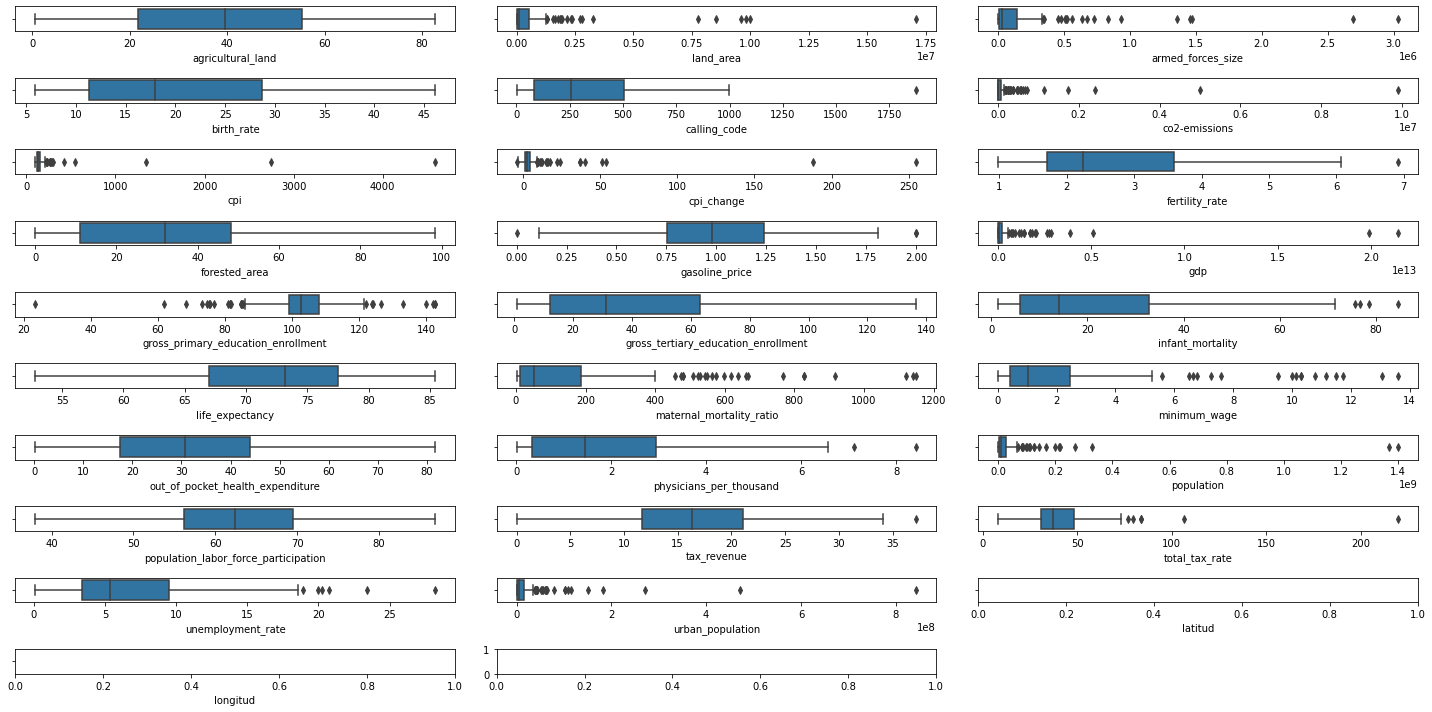

In [21]:
# lo siguiente que tendríamos que hacer es ver si dentro de las columnas donde tenemos nulos tenemos valores atípicos. 
# Para hacer esto lo mejor es usar visualización, sin embargo, todavía no hemos aprendido (lo haremos mañana). 
# Por lo tanto, el código que tenéis a continuación no es necesario que lo entendais. 

fig, axes = plt.subplots(nrows = 10, ncols = 3, figsize = (20,10)) 

axes = axes.flat

for indice, col in enumerate(nulos_esta_num):
    sns.boxplot(x = col, data = df, ax = axes[indice])
    
plt.tight_layout()
fig.delaxes(axes[-1]);